# Import

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')
sns.set_palette('hls')
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv("./data/nationalhealth_2010to2021.csv")
df_20 = pd.read_csv("./data/nationalhealth_2010to2021.csv")
m_data = pd.read_excel("./data/meta_data20.xlsx")



In [48]:
df = pd.read_csv("./data/nationalhealth_2010to2021.csv")
m_data = pd.read_excel("./data/meta_data20.xlsx")

def trans(val): #변수 번역 input str
        return m_data["variable description"][m_data["variable"] == val].values[0]

def disc(val): #설문 내역
        return m_data["option description"][m_data["variable"] == val].values[0]
        
def change2None(data): #통계량을 측정할 때, 결측값 복원
    for i in data.columns:
        data.replace({i:{-1:None}},inplace = True)
        data.replace({i:{-2:None}},inplace = True)
    return data


#타겟 + 피쳐 str list
col_li = df.columns.to_list() 
#타겟 str list
target_li = df.columns[-13:].to_list()
#피쳐 str list
fea_li = df.columns[:-13].to_list()

#범주형 자료 str list
temp = list(m_data["variable"][m_data['data type']== "category"].values)
cat_li = [i for i in temp if i in col_li] #범주형 자료 컬럼 : cat_li
#연속형 자료 str list
temp = list(m_data["variable"][m_data['data type']== "numeric"].values)
expcept = ['ID', 'ID_fam', 'LW_mt_a1', 'age', 'year']
num_li = [i for i in temp if i in col_li] #연속형 자료 컬럼 : num_li
#이진형 자료 str list
bin_col = [i for i in col_li if len(df[i].unique()) < 4] #이진형 자료 컬럼 : bin_col
cat_li = list(set(cat_li)-set(bin_col))


In [41]:
print(len(df.columns))
print(len(cat_li) + len(bin_col) + len(num_li) + len(expcept))

122
122


In [70]:
#Target on Project
cnt = 0
df["Target"] = [0 for i in range(len(df))]
for i in range(len(df)):
    if df['고혈압'][i] == 1.0 or df['B형간염'][i] or df['당뇨병'][i] == 1.0 or df['협심증또는심근경색증'][i] == 1.0 or df['뇌졸중'][i]:
        df["Target"][i] = 1.0
df["Target"].value_counts()

1    20265
0    15364
Name: Target, dtype: int64

# 이진 변수 검정

In [43]:
#이진 변수 간 유사도 검정
dfN = change2None(df)

def score(col1, col2, df = df):
    intersection = (df[col1]==1) & (df[col2]==1)
    union_1 = (df[col1]==1) & (df[col2]==0)
    union_2 = (df[col1]==0) & (df[col2]==1)
    union_3 = (df[col1]==1) & (df[col2]==1)
    #print(sum(intersection) + (sum(union_1)+sum(union_2)+sum(union_3)))
    
    return sum(intersection) / (sum(union_1)+sum(union_2)+sum(union_3))


target = ["고혈압","당뇨병","B형간염","협심증또는심근경색증","뇌졸중"]

temp = [[score(i,target[j],dfN) for j in range(5)] for i in target]
temp
score = pd.DataFrame(temp, index = target, columns=target)

score

,고혈압,당뇨병,B형간염,협심증또는심근경색증,뇌졸중
고혈압,1.000000,0.247195,0.027806,0.072963,0.065834
당뇨병,0.247195,1.000000,0.025783,0.091290,0.071483
B형간염,0.027806,0.025783,1.000000,0.014412,0.012910
협심증또는심근경색증,0.072963,0.091290,0.014412,1.000000,0.062090
뇌졸중,0.065834,0.071483,0.012910,0.062090,1.000000


In [35]:
#이진화 column marri_1 
df = pd.read_csv("./data/nationalhealth_2010to2021.csv")
dfN = change2None(df)
bin_feature = [(i,trans(i),disc(i)) for i in set(bin_col)-set(target_li)]


24

In [32]:
dic = {"marri_1":[(1,2),(1,0)], #기혼 미혼 >> 아니오, 예
'sex':[(1,2),(0,1)], #남 여 
"HE_rPLS":[(0,1),(1,0)], #규칙적 불규칙적
"EC1_1":[(1,2),(1,0)], # 함 안함 
"town_t":[(1,2),(1,0)], # 도시 촌
"allownc":[(10,20),(1,0)]} #있음 없음

#replace
dfN["marri_1"].replace((1,2),(1,0), inplace = True)
dfN["HE_rPLS"].replace((1,2),(0,1), inplace = True)
dfN["EC1_1"].replace((1,2),(1,0), inplace = True)
dfN["town_t"].replace((1,2),(1,0), inplace = True)
dfN["allownc"].replace((10,20),(1,0), inplace = True)
dfN["sex"].replace((1,2),(0,1), inplace = True)

'''temp = [[score(i,bin_col[j]) for j in range(len(bin_col))] for i in bin_col]
temp
score = pd.DataFrame(temp, index = target, columns=target)'''

print(bin_col[0], bin_col[1])
score(bin_col[0],bin_col[1],dfN)
dfN["sex"].unique()


town_t sex


TypeError: 'DataFrame' object is not callable

In [372]:
corr = dfN.loc[:,cat_li].fillna(0).corr()


plt.figure(figsize=(100,50))
#sns.heatmap(corr, annot=True, fmt=".1f", cmap="Blues")
print(corr[corr.loc[:,cat_li]> 0.4])
'''temp = []
for i in corr.columns.to_list():
    try: temp.append(trans(i))
    except: pass
temp'''

         region  town_t  sex     incm  ho_incm     incm5  ho_incm5       edu  \
region      1.0     NaN  NaN      NaN      NaN       NaN       NaN       NaN   
town_t      NaN     1.0  NaN      NaN      NaN       NaN       NaN       NaN   
sex         NaN     NaN  1.0      NaN      NaN       NaN       NaN       NaN   
incm        NaN     NaN  NaN  1.00000  0.77666  0.948205  0.792757       NaN   
ho_incm     NaN     NaN  NaN  0.77666  1.00000  0.787825  0.947673  0.487095   
...         ...     ...  ...      ...      ...       ...       ...       ...   
HE_Uglu     NaN     NaN  NaN      NaN      NaN       NaN       NaN       NaN   
HE_Uket     NaN     NaN  NaN      NaN      NaN       NaN       NaN       NaN   
HE_Ubil     NaN     NaN  NaN      NaN      NaN       NaN       NaN       NaN   
HE_Ubld     NaN     NaN  NaN      NaN      NaN       NaN       NaN       NaN   
HE_Uro      NaN     NaN  NaN      NaN      NaN       NaN       NaN       NaN   

         occp  cfam  ...  HE_DMfh3  HE_

'temp = []\nfor i in corr.columns.to_list():\n    try: temp.append(trans(i))\n    except: pass\ntemp'

<Figure size 7200x3600 with 0 Axes>

In [347]:
#HE_DMdr    0.319926
#HE_hepaB << b형감염 drop

array([0.0, 1.0, None], dtype=object)

In [90]:
round(8898/26731 *100,2)

33.29

In [68]:
#Feature Importance Module
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

def rf_fe_importance(data, target_name, data_type, num):
    '''
    랜덤포레스트로 변수중요도 구하기
        target_name : 변수이름
        num : 상위n개 변수 뽑기
    '''
    if data_type == "binary":
        features = data.loc[:, bin_col].columns.drop(target_li)
    elif data_type == "cataegory":
        features = data.loc[:, list(set(cat_li)-set(bin_col))].columns
    elif data_type == "numeric":
        features = data.loc[:, num_li].columns
    elif data_type == "all": 
        features = data.loc[:, num_li+cat_li].columns
    
    X = data[features]
    y = data[target_name]

    X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y,test_size=0.1, random_state=42)

    model = RandomForestClassifier(n_estimators=5, random_state=0, max_depth = 15)
    model.fit(X_train, y_train)

    predict = model.predict(X_test)
    print("tain set accuracy: ", metrics.accuracy_score(y_train, model.predict(X_train)))
    print("test set accuracy: ", metrics.accuracy_score(y_test, model.predict(X_test)))
    df = pd.DataFrame(model.feature_importances_, index =features)[:num].sort_values(0, ascending=False)
    return df

In [49]:
type(cat_li)

list

In [53]:
FI_a = rf_fe_importance(df,"Target","all",10)
FI_a

tain set accuracy:  0.9361317283103598
test set accuracy:  0.8111142295818131


,0
HE_sbp,0.106079
HE_dbp,0.073161
HE_HbA1c,0.054365
HE_glu,0.053454
HE_wc,0.038115
HE_BMI,0.012321
HE_ht,0.010260
HE_wt,0.009216
EC_wht_23,0.008637
HE_fst,0.004094


In [71]:
FI_b = rf_fe_importance(df,"Target","binary",10)
arr = [trans(i) for i in list(FI_b.index)] ; FI_b["kor"] = arr
arr2 = [len(df[i].unique()) for i in list(FI_b.index)] ; FI_b["unique"] = arr2
print("\n")
FI_n = rf_fe_importance(df,"Target","numeric",10)
arr = [trans(i) for i in list(FI_n.index)] ; FI_n["kor"] = arr
arr2 = [len(df[i].unique()) for i in list(FI_n.index)] ; FI_n["unique"] = arr2
print("\n")
FI_c = rf_fe_importance(df,"Target","cataegory",10)
arr = [trans(i) for i in list(FI_c.index)] ; FI_c["kor"] = arr
arr2 = [len(df[i].unique()) for i in list(FI_c.index)] ; FI_c["unique"] = arr2

#FI_b
#tain set accuracy:  0.7955154992827294
#test set accuracy:  0.7457198989615492

#FI_n
#tain set accuracy:  0.9865589721200025
#test set accuracy:  0.8647207409486388

#FI_c
#tain set accuracy:  0.9711532464292397
#test set accuracy:  0.7628403031153522

tain set accuracy:  0.6974053514626084
test set accuracy:  0.6820095425203481


tain set accuracy:  0.9264953533337491
test set accuracy:  0.7726634858265506


tain set accuracy:  0.8505270379841576
test set accuracy:  0.7266348582655066


In [72]:
print("binary")
print(FI_b)
print("\n")
print("numeric")
print(FI_n)
print("\n")
print("cataegory")
print("\n")
print(FI_c)
print("\n")

binary
                  0               kor  unique
HE_HPdr    0.201550  검진당일 고혈압 약 복용 여부       3
HE_DMdr    0.137109  검진당일 당뇨병 약 복용 여부       3
EC1_1      0.054090           경제활동 상태       2
HE_mens    0.044111              생리여부       3
dr_month   0.041287             월간음주율       2
town_t     0.032847           동/읍면 구분       2
marri_1    0.031295              결혼여부       3
allownc    0.019799         기초생활수급 여부       3
mh_stress  0.019452          스트레스 인지율       2
sex        0.006173                성별       2


numeric
                  0                 kor  unique
HE_sbp     0.157051  최종 수축기 혈압(2,3차 평균)     236
HE_HbA1c   0.115372               당화혈색소     109
HE_dbp     0.074692  최종 이완기 혈압(2,3차 평균)     164
HE_glu     0.042377                공복혈당     270
HE_wc      0.024297                허리둘레     646
HE_ht      0.018422                  신장     608
HE_BMI     0.018053               체질량지수   29784
HE_wt      0.012725                  체중     781
EC_wht_23  0.011327          주당 평균 근로시간     1

In [225]:
'''ho_incm   0.017152             소득 4분위수(가구)       4
ho_incm5  0.016469             소득 5분위수(가구)       5
incm5     0.012329             소득 5분위수(개인)       5
incm      0.011699             소득 4분위수(개인)       4''' #drop_col

,ID,ID_fam,year,region,town_t,sex,age,incm,ho_incm,incm5,...,고중성지방혈증,B형간염,빈혈,뇌졸중,협심증또는심근경색증,천식,아토피피부염,골관절염,우울증,Target
0,b'A308780901',b'A3087809',2010.0,1.0,1.0,1.0,74.0,3.0,2.0,4.0,...,1.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,1
1,b'A309099802',b'A3090998',2010.0,1.0,1.0,2.0,71.0,2.0,1.0,2.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1
2,b'A309460901',b'A3094609',2010.0,1.0,1.0,2.0,61.0,3.0,2.0,4.0,...,0.0,0.0,0.0,NaN,NaN,1.0,NaN,1.0,NaN,1
3,b'A309460902',b'A3094609',2010.0,1.0,1.0,1.0,32.0,2.0,2.0,2.0,...,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,1
4,b'A310439801',b'A3104398',2010.0,1.0,1.0,2.0,63.0,4.0,4.0,5.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35624,b'R904322404',b'R9043224',2021.0,8.0,0.0,1.0,53.0,3.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
35625,b'R904332601',b'R9043326',2021.0,8.0,0.0,1.0,50.0,2.0,2.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
35626,b'R904346201',b'R9043462',2021.0,8.0,0.0,2.0,54.0,4.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
35627,b'R904353001',b'R9043530',2021.0,8.0,0.0,1.0,45.0,3.0,3.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
# Step 1 - Make a scatter plot with square markers, set column names as labels

def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
data = pd.read_csv('https://raw.githubusercontent.com/drazenz/heatmap/master/autos.clean.csv')
columns = ['bore', 'stroke', 'compression-ratio', 'horsepower', 'city-mpg', 'price'] 
corr = data[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)

1 : 예(취업자) | 2 : 아니오(실업자, 비경제활동인구) | 8 : 비해당(만15세미만) | 9 : 모름, 무응답 |
1 : 동 | 2 : 읍·면 |
1 : 기혼 | 2 : 미혼 | 9 : 모름, 무응답 |


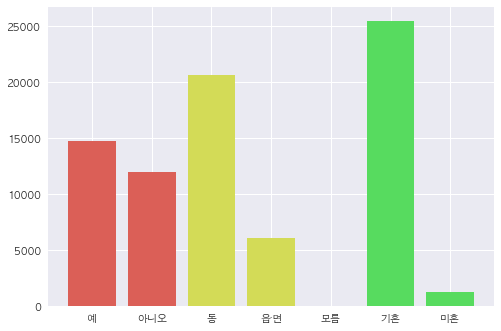

In [85]:
#reliance of binary FI
'''
EC1_1    0.053283    경제활동 상태       2
town_t   0.043039    동/읍면 구분       2
marri_1  0.035159       결혼여부       3
allownc  0.034125  기초생활수급 여부       3
sex
'''

print(disc("EC1_1"))
data = df.groupby(['EC1_1'])['성인병'].sum()
index = ["예","아니오"]
ax1=plt.bar(index,data)

print(disc("town_t"))
data = df.groupby(['town_t'])['성인병'].sum()
index = ["동","읍·면"]
ax2=plt.bar(index,data)

print(disc("marri_1"))
data = df.groupby(['marri_1'])['성인병'].sum()
index = ["모름","기혼","미혼"]
ax3=plt.bar(index,data)

In [93]:
df["B형간염"].value_counts()

0.0    34437
1.0     1192
Name: B형간염, dtype: int64

In [680]:
#cluster 특징 검사
df20 = pd.read_csv("./20_data.csv")
df40 = pd.read_csv("./40_data.csv")

df40['cluster'].value_counts()
df20['cluster'].value_counts()

#df[df["age"] >= 40]

1    3165
3     613
2      13
0      10
Name: cluster, dtype: int64

In [682]:
print(df40['cluster'].value_counts())

print(df20['cluster'].value_counts())




2    25756
3     3939
0      141
1        5
Name: cluster, dtype: int64
1    3165
3     613
2      13
0      10
Name: cluster, dtype: int64


In [586]:
dic = {"고혈압": ["HE_sbp", "HE_dbp", "HE_HbA1c"],
"비만": ['HE_BMI', 'HE_wt', 'HE_wc'],
"당뇨병": ['HE_HbA1c','HE_glu','HE_chol'],
"고콜레스테롤혈증":['HE_chol','HE_HbA1c','HE_TG'],
"고중성지방혈증":['HE_TG', 'HE_HDL_st2', 'HE_chol'],
"골관절염" :['HE_ht','EC_wht_23','HE_HCT']
}
dic["고혈압"]

['HE_sbp', 'HE_dbp', 'HE_HbA1c']

In [569]:
target_li

['비만',
 '고혈압',
 '당뇨병',
 '고콜레스테롤혈증',
 '고중성지방혈증',
 'B형간염',
 '빈혈',
 '뇌졸중',
 '협심증또는심근경색증',
 '천식',
 '아토피피부염',
 '골관절염',
 '우울증']

In [486]:
bins= [m_data["variable bins"][m_data["variable"] == i] for i in num_li]
bins
#bi = str(bins[0].values[0]).split(':')
#df[num_li[0]].unique()

#bi
#np.digitize(data[num_li[0]], bins=bi)

[273    1.0:222.75:444.5:666.25:888.0
 Name: variable bins, dtype: object,
 428    0.0:16.25:32.5:48.75:65.0
 Name: variable bins, dtype: object,
 466    80.0:117.5:155.0:192.5:230.0
 Name: variable bins, dtype: object,
 467    32.0:56.25:80.5:104.75:129.0
 Name: variable bins, dtype: object,
 469    73.1:104.32499999999999:135.55:166.775:198.0
 Name: variable bins, dtype: object,
 470    9.269:48.15175:87.03450000000001:125.917250000...
 Name: variable bins, dtype: object,
 471    45.8:71.225:96.65:122.075:147.5
 Name: variable bins, dtype: object,
 473    12.522534423464974:25.052036346189123:37.58153...
 Name: variable bins, dtype: object,
 477    40.0:137.5:235.0:332.5:430.0
 Name: variable bins, dtype: object,
 478    3.1:6.050000000000001:9.0:11.950000000000001:14.9
 Name: variable bins, dtype: object,
 482    80.0:164.5:249.0:333.5:418.0
 Name: variable bins, dtype: object,
 483    15.0:38.25:61.5:84.75:108.0
 Name: variable bins, dtype: object,
 484    22.0:693.5:1365.0:2036.5:

In [384]:
def digitize(data, m_data):
    bin_arr = [str(m_data["variable bins"][m_data["variable"] == i]) for i in num_li]
    for n,col in enumerate(num_li):
        str_bins = str(bins[n].values[0])
        
        for num in str_bins.split(':'):
            bins.append(float(num))
            try:
                data[col] = np.digitize(data[col], bins=bins)
            except: print(col)
        
    return str_bins

In [386]:
dfd = digitize(df,m_data)
#for i in num_li:
#    print(dfd[i].unique())

EC_wht_23
EC_wht_23
EC_wht_23
EC_wht_23
EC_wht_23
HE_fst
HE_fst
HE_fst
HE_fst
HE_fst
HE_sbp
HE_sbp
HE_sbp
HE_sbp
HE_sbp
HE_dbp
HE_dbp
HE_dbp
HE_dbp
HE_dbp
HE_ht
HE_ht
HE_ht
HE_ht
HE_ht
HE_wt
HE_wt
HE_wt
HE_wt
HE_wt
HE_wc
HE_wc
HE_wc
HE_wc
HE_wc
HE_BMI
HE_BMI
HE_BMI
HE_BMI
HE_BMI
HE_glu
HE_glu
HE_glu
HE_glu
HE_glu
HE_HbA1c
HE_HbA1c
HE_HbA1c
HE_HbA1c
HE_HbA1c
HE_chol
HE_chol
HE_chol
HE_chol
HE_chol
HE_HDL_st2
HE_HDL_st2
HE_HDL_st2
HE_HDL_st2
HE_HDL_st2
HE_TG
HE_TG
HE_TG
HE_TG
HE_TG
HE_ast
HE_ast
HE_ast
HE_ast
HE_ast
HE_alt
HE_alt
HE_alt
HE_alt
HE_alt
HE_HB
HE_HB
HE_HB
HE_HB
HE_HB
HE_HCT
HE_HCT
HE_HCT
HE_HCT
HE_HCT
HE_BUN
HE_BUN
HE_BUN
HE_BUN
HE_BUN
HE_crea
HE_crea
HE_crea
HE_crea
HE_crea
HE_WBC
HE_WBC
HE_WBC
HE_WBC
HE_WBC
HE_RBC
HE_RBC
HE_RBC
HE_RBC
HE_RBC
HE_Bplt
HE_Bplt
HE_Bplt
HE_Bplt
HE_Bplt
HE_Uph
HE_Uph
HE_Uph
HE_Uph
HE_Uph
HE_Usg
HE_Usg
HE_Usg
HE_Usg
HE_Usg
HE_Ucrea
HE_Ucrea
HE_Ucrea
HE_Ucrea
HE_Ucrea
N_INTK
N_INTK
N_INTK
N_INTK
N_INTK
N_EN
N_EN
N_EN
N_EN
N_EN
N_WATER
N_WATER
N_WA

In [284]:
dfd = digitize(df,m_data)
for i in num_li:
    print(dfd[i], trans(i))

0        1
1        0
2        0
3        1
4        0
        ..
35624    1
35625    1
35626    0
35627    1
35628    1
Name: EC_wht_23, Length: 35629, dtype: int64 주당 평균 근로시간
0        1
1        1
2        1
3        1
4        1
        ..
35624    1
35625    1
35626    1
35627    1
35628    1
Name: HE_fst, Length: 35629, dtype: int64 공복시간
0        0
1        0
2        0
3        0
4        0
        ..
35624    0
35625    0
35626    0
35627    0
35628    0
Name: HE_sbp, Length: 35629, dtype: int64 최종 수축기 혈압(2,3차 평균)
0        0
1        0
2        0
3        0
4        0
        ..
35624    0
35625    0
35626    0
35627    0
35628    0
Name: HE_dbp, Length: 35629, dtype: int64 최종 이완기 혈압(2,3차 평균)
0        0
1        0
2        0
3        0
4        0
        ..
35624    0
35625    0
35626    0
35627    0
35628    0
Name: HE_ht, Length: 35629, dtype: int64 신장
0        0
1        0
2        0
3        0
4        0
        ..
35624    0
35625    0
35626    0
35627    0
35628    0
Name:

In [155]:
#생활습관 보유유무를 조건 >> (단일)만성질환 유병 유무를 결과로 하는 연관규칙분석(이진화 된 column만을 사용)

# -1 to None
pre_dt = change2None(df[bin_col[:-13]]) #rename(columns = lambda x: trans(x)) #; 변수 설명변환


pre_dt = pre_dt.dropna(axis=0) #35629 >> 15640
pre_dt

['town_t', 'sex', 'allownc', 'marri_1', 'EC1_1', 'dr_month', 'mh_stress', 'HE_HPdr', 'HE_DMdr', 'HE_mens', 'HE_prg', 'HE_HPfh1', 'HE_HPfh2', 'HE_HLfh1', 'HE_HLfh2', 'HE_IHDfh1', 'HE_IHDfh2', 'HE_STRfh1', 'HE_STRfh2', 'HE_DMfh1', 'HE_DMfh2', 'HE_rPLS', 'HE_hepaB', 'HE_Unitr', '비만', '고혈압', '당뇨병', '고콜레스테롤혈증', '고중성지방혈증', 'B형간염', '빈혈', '뇌졸중', '협심증또는심근경색증', '천식', '아토피피부염', '골관절염', '우울증']


,town_t,sex,allownc,marri_1,EC1_1,dr_month,mh_stress,HE_HPdr,HE_DMdr,HE_mens,...,HE_HLfh2,HE_IHDfh1,HE_IHDfh2,HE_STRfh1,HE_STRfh2,HE_DMfh1,HE_DMfh2,HE_rPLS,HE_hepaB,HE_Unitr
1,1.0,2.0,20.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,2.0,20.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6,1.0,2.0,20.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15,1.0,2.0,20.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20,1.0,2.0,20.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35444,2.0,2.0,10.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
35463,2.0,2.0,20.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
35474,2.0,2.0,20.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
35548,1.0,2.0,20.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [185]:
def list_maker(data_list):
    
    output_list=dict()
    tmp_list=disc(data_list).split(" | ")
    for i in tmp_list:
        num, val = i.split(" : ")
        output_list[float(num)]= f"{trans(data_list)} >> {val}" 
    
    return output_list

list_maker('HE_HPdr')

{0.0: '검진당일 고혈압 약 복용 여부 >> 아니오', 1.0: '검진당일 고혈압 약 복용 여부 >> 예 |'}

In [188]:
temp = []
for i in pre_dt:
    temp.append(list_maker(i))
temp[0]

{1.0: '동/읍면 구분 >> 동', 2.0: '동/읍면 구분 >> 읍·면 |'}

In [213]:
for i in range(len(bin_col[:-13])):
    pre_dt.replace(temp[i])
    pre_dt.loc[:,bin_col[i]].replace(temp[i],inplace = True)
pre_dt

,town_t,sex,allownc,marri_1,EC1_1,dr_month,mh_stress,HE_HPdr,HE_DMdr,HE_mens,...,HE_HLfh2,HE_IHDfh1,HE_IHDfh2,HE_STRfh1,HE_STRfh2,HE_DMfh1,HE_DMfh2,HE_rPLS,HE_hepaB,HE_Unitr
1,동/읍면 구분 >> 동,성별 >> 여자 |,기초생활수급 여부 >> 수급경험 없음,결혼여부 >> 기혼,"경제활동 상태 >> 아니오(실업자, 비경제활동인구)",월간음주율 >> 최근 1년간 월1잔이상 음주 |,스트레스 인지율 >> 스트레스 적게 느낌(문항2-),검진당일 고혈압 약 복용 여부 >> 아니오,검진당일 당뇨병 약 복용 여부 >> 아니오,생리여부 >> 아니오,...,고지혈증 의사진단 여부(모) >> 아니오,허혈성심장질환 의사진단 여부(부) >> 아니오,허혈성심장질환 의사진단 여부(모) >> 아니오,뇌졸중 의사진단 여부(부) >> 아니오,뇌졸중 의사진단 여부(모) >> 아니오,당뇨병 의사진단 여부(부) >> 아니오,당뇨병 의사진단 여부(모) >> 아니오,맥박 규칙성 여부 >> 규칙적,B형간염표면항원 양성여부(10세이상) >> 음성,아질산염 >> 음성
4,동/읍면 구분 >> 동,성별 >> 여자 |,기초생활수급 여부 >> 수급경험 없음,결혼여부 >> 기혼,"경제활동 상태 >> 아니오(실업자, 비경제활동인구)",월간음주율 >> 최근 1년간 월1잔이상 음주 |,스트레스 인지율 >> 스트레스 적게 느낌(문항2-),검진당일 고혈압 약 복용 여부 >> 아니오,검진당일 당뇨병 약 복용 여부 >> 아니오,생리여부 >> 아니오,...,고지혈증 의사진단 여부(모) >> 예,허혈성심장질환 의사진단 여부(부) >> 아니오,허혈성심장질환 의사진단 여부(모) >> 아니오,뇌졸중 의사진단 여부(부) >> 아니오,뇌졸중 의사진단 여부(모) >> 아니오,당뇨병 의사진단 여부(부) >> 아니오,당뇨병 의사진단 여부(모) >> 예,맥박 규칙성 여부 >> 규칙적,B형간염표면항원 양성여부(10세이상) >> 음성,아질산염 >> 음성
6,동/읍면 구분 >> 동,성별 >> 여자 |,기초생활수급 여부 >> 수급경험 없음,결혼여부 >> 기혼,"경제활동 상태 >> 아니오(실업자, 비경제활동인구)","월간음주율 >> 평생비음주, 최근1년간 월1잔미만 음주",스트레스 인지율 >> 스트레스 적게 느낌(문항2-),검진당일 고혈압 약 복용 여부 >> 아니오,검진당일 당뇨병 약 복용 여부 >> 아니오,생리여부 >> 아니오,...,고지혈증 의사진단 여부(모) >> 아니오,허혈성심장질환 의사진단 여부(부) >> 아니오,허혈성심장질환 의사진단 여부(모) >> 아니오,뇌졸중 의사진단 여부(부) >> 아니오,뇌졸중 의사진단 여부(모) >> 아니오,당뇨병 의사진단 여부(부) >> 아니오,당뇨병 의사진단 여부(모) >> 아니오,맥박 규칙성 여부 >> 규칙적,B형간염표면항원 양성여부(10세이상) >> 음성,아질산염 >> 음성
15,동/읍면 구분 >> 동,성별 >> 여자 |,기초생활수급 여부 >> 수급경험 없음,결혼여부 >> 기혼,"경제활동 상태 >> 아니오(실업자, 비경제활동인구)","월간음주율 >> 평생비음주, 최근1년간 월1잔미만 음주",스트레스 인지율 >> 스트레스 적게 느낌(문항2-),검진당일 고혈압 약 복용 여부 >> 아니오,검진당일 당뇨병 약 복용 여부 >> 아니오,생리여부 >> 아니오,...,고지혈증 의사진단 여부(모) >> 아니오,허혈성심장질환 의사진단 여부(부) >> 아니오,허혈성심장질환 의사진단 여부(모) >> 아니오,뇌졸중 의사진단 여부(부) >> 아니오,뇌졸중 의사진단 여부(모) >> 아니오,당뇨병 의사진단 여부(부) >> 아니오,당뇨병 의사진단 여부(모) >> 아니오,맥박 규칙성 여부 >> 규칙적,B형간염표면항원 양성여부(10세이상) >> 음성,아질산염 >> 음성
20,동/읍면 구분 >> 동,성별 >> 여자 |,기초생활수급 여부 >> 수급경험 없음,결혼여부 >> 기혼,경제활동 상태 >> 예(취업자),"월간음주율 >> 평생비음주, 최근1년간 월1잔미만 음주",스트레스 인지율 >> 스트레스 많이 느낌(문항2-②) |,검진당일 고혈압 약 복용 여부 >> 아니오,검진당일 당뇨병 약 복용 여부 >> 아니오,생리여부 >> 아니오,...,고지혈증 의사진단 여부(모) >> 아니오,허혈성심장질환 의사진단 여부(부) >> 아니오,허혈성심장질환 의사진단 여부(모) >> 예,뇌졸중 의사진단 여부(부) >> 아니오,뇌졸중 의사진단 여부(모) >> 아니오,당뇨병 의사진단 여부(부) >> 아니오,당뇨병 의사진단 여부(모) >> 아니오,맥박 규칙성 여부 >> 규칙적,B형간염표면항원 양성여부(10세이상) >> 음성,아질산염 >> 음성
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35444,동/읍면 구분 >> 읍·면 |,성별 >> 여자 |,기초생활수급 여부 >> 수급경험 있음(과거 또는 현재),결혼여부 >> 기혼,"경제활동 상태 >> 아니오(실업자, 비경제활동인구)","월간음주율 >> 평생비음주, 최근1년간 월1잔미만 음주",스트레스 인지율 >> 스트레스 많이 느낌(문항2-②) |,검진당일 고혈압 약 복용 여부 >> 아니오,검진당일 당뇨병 약 복용 여부 >> 예 |,생리여부 >> 아니오,...,고지혈증 의사진단 여부(모) >> 아니오,허혈성심장질환 의사진단 여부(부) >> 아니오,허혈성심장질환 의사진단 여부(모) >> 아니오,뇌졸중 의사진단 여부(부) >> 예,뇌졸중 의사진단 여부(모) >> 아니오,당뇨병 의사진단 여부(부) >> 아니오,당뇨병 의사진단 여부(모) >> 아니오,맥박 규칙성 여부 >> 규칙적,B형간염표면항원 양성여부(10세이상) >> 음성,아질산염 >> 음성
35463,동/읍면 구분 >> 읍·면 |,성별 >> 여자 |,기초생활수급 여부 >> 수급경험 없음,결혼여부 >> 기혼,경제활동 상태 >> 예(취업자),"월간음주율 >> 평생비음주, 최근1년간 월1잔미만 음주",스트레스 인지율 >> 스트레스 적게 느낌(문항2-),검진당일 고혈압 약 복용 여부 >> 아니오,검진당일 당뇨병 약 복용 여부 >> 아니오,생리여부 >> 아니오,...,고지혈증 의사진단 여부(모) >> 아니오,허혈성심장질환 의사진단 여부(부) >> 아니오,허혈성심장질환 의사진단 여부(모) >> 아니오,뇌졸중 의사진단 여부(부) >> 아니오,뇌졸중 의사진단 여부(모) >> 아니오,당뇨병 의사진단 여부(부) >> 아니오,당뇨병 의사진단 여부(모) >> 예,맥박 규칙성 여부 >> 규칙적,B형간염표면항원 양성여부(10세이상) >> 양성 |,아질산염 >> 음성
35474,동/읍면 구분 >> 읍·면 |,성별 >> 여자 |,기초생활수급 여부 >> 수급경험 없음,결혼여부 >> 기혼,"경제활동 상태 >> 아니오(실업자, 비경제활동인구)","월간음주율 >> 평생비음주, 최근1년간 월1잔미만 음주",스트레스 인지율 >> 스트레스 적게 느낌(문항2-),검진당일 고혈압 약 복용 여부 >> 아니오,검진당일 당뇨병 약 복용 여부 >> 아니오,생리여부 >> 아니오,...,고지혈증 의사진단 여부(모) >> 아니오,허혈성심장질환 의사진단 여부(부) >> 아니오,허혈성심장질환 의사진단 여부(모) >> 아니오,뇌졸중 의사진단 여부(부) >> 아니오,뇌졸중 의사진단 여부(모) >> 아니오,당뇨병 의사진단 여부(부) >> 아니오,당뇨병 의사진단 여부(모) >> 아니오,맥박 규칙성 여부 >> 규칙적,B형간염표면항원 양성여부(10세이상) >> 양성 |,아질산염 >> 음성
35548,동/읍면 구분 >> 동,성별 >> 여자 |,기초생활수급 여부 >> 수급경험 없음,결혼여부 >> 기혼,"경제활동 상태 >> 아니오(실업자, 비경제활동인구)","월간음주율 >> 평생비음주, 최근1년간 월1잔미만 음주",스트레스 인지율 >> 스트레스 적게 느낌(문항2-),검진당일 고혈압 약 복용 여부 >> 아니오,검진당일 당뇨병 약 복용 여부 >> 아니오,생리여부 >> 아니오,...,고지혈증 의사진단 여부(모) >> 아니오,허혈성심장질환 의사진단 여부(부)

In [247]:
records = []
for i in range(len(pre_dt)):
    records.append([str(pre_dt.values[i,j]) for j in range(0, len(pre_dt.columns))])

records[:100])

100

In [228]:
m_data

,variable,variable description,option description,etc,data type,not applicable,unknown,variable bins
0,mod_d,최종 DB 수정일,NaN,[],object,NaN,NaN,NaN
1,ID,개인 아이디,NaN,[],object,NaN,NaN,NaN
2,ID_fam,가구 아이디,NaN,[],object,NaN,NaN,NaN
3,year,조사연도,NaN,[],object,NaN,NaN,NaN
4,region,17개 시도,1 : 서울 | 2 : 부산 | 3 : 대구 | 4 : 인천 | 5 : 광주 | 6...,[],category,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
747,LF_S14_1,식비가 부족하여 가구 내 아동이 식사를 거른 빈도,1 : 예 | 2 : 아니오 | 3 : 모름/응답거부 | 8 : 비해당(아동 미 거...,[],category,8.0,9.0,NaN
748,LF_S15,식비가 부족하여 가구 내 아동이 배가 고픈데도 먹지 못한 경험,1 : 예 | 2 : 아니오 | 3 : 모름/응답거부 | 8 : 비해당(아동 미 거...,[],category,8.0,9.0,NaN
749,LF_S16,식비가 부족하여 가구 내 아동이 하루 종일 굶은 경험,1 : 예 | 2 : 아니오 | 3 : 모름/응답거부 | 8 : 비해당(아동 미 거...,[],category,8.0,9.0,NaN
750,LF_SECUR,식품안정성 점수,NaN,['문항2-16(식품안정성조사 18항목) 점수 합'],numeric,NaN,NaN,0.0:4.25:8.5:12.75:17.0


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm.notebook import tqdm


dt = sns.load_dataset('titanic')
dt = dt[["class", "sex", "age", "alive"]]
dt = dt.dropna(axis=0)
dt.head()
child_idx = dt.age < 20
adult_idx = (dt.age >= 20) & (dt.age < 60)
old_idx = dt.age >= 60

dt.loc[child_idx, "age"] = "child"
dt.loc[adult_idx, "age"] = "adult"
dt.loc[old_idx, "age"] = "old"
from apyori import apriori

records = []
for i in range(len(dt)):
    records.append([str(dt.values[i,j]) for j in range(0, len(dt.columns))])
    
association_rules = apriori(records, min_support=0.005, min_confidence=0.8)
association_results = list(association_rules)

association_results[1]
rules = []
for results in tqdm(association_results):
    supp = results.support
    for orders in results.ordered_statistics:
        if(orders.items_add in [{'yes'},{'no'}]):
            conf = orders.confidence
            lift = orders.lift
            hypo = orders.items_base
            conc = orders.items_add
            rules.append([hypo,conc,supp,conf,lift])

rules[:5]

In [255]:
from apyori import apriori
from tqdm.notebook import tqdm


association_rules = apriori(records, min_support=0.005, min_confidence=0.8)
association_results = list(association_rules)

association_results[1]

rules = []
for results in tqdm(association_results):
    supp = results.support

    for orders in results.ordered_statistics:
        if(orders.items_add in [{'yes'},{'no'}]):
            conf = orders.confidence
            lift = orders.lift
            hypo = orders.items_base
            conc = orders.items_add
            rules.append([hypo,conc,supp,conf,lift])

labels=["hypothesis","conclusion","support","confidence","lift"]

rules_dataframe = pd.DataFrame.from_records(rules, columns=labels)

rules_dataframe_sort = rules_dataframe.sort_values(["lift"], ascending=[False])
rules_dataframe_sort = rules_dataframe_sort.reset_index(drop = True)
rules_dataframe_sort

KeyboardInterrupt: 

In [58]:
pd.read_csv("./data/nationalhealth_2010to2021.csv").drop(['ID', 'ID_fam'], axis = 1)

,year,region,town_t,sex,age,incm,ho_incm,incm5,ho_incm5,edu,...,고콜레스테롤혈증,고중성지방혈증,B형간염,빈혈,뇌졸중,협심증또는심근경색증,천식,아토피피부염,골관절염,우울증
0,2010.0,1.0,1.0,1.0,74.0,3.0,2.0,4.0,2.0,3.0,...,0.0,1.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0
1,2010.0,1.0,1.0,2.0,71.0,2.0,1.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,2010.0,1.0,1.0,2.0,61.0,3.0,2.0,4.0,3.0,3.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0
3,2010.0,1.0,1.0,1.0,32.0,2.0,2.0,2.0,3.0,3.0,...,0.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
4,2010.0,1.0,1.0,2.0,63.0,4.0,4.0,5.0,5.0,1.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35624,2021.0,8.0,2.0,1.0,53.0,3.0,3.0,3.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35625,2021.0,8.0,2.0,1.0,50.0,2.0,2.0,2.0,3.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35626,2021.0,8.0,2.0,2.0,54.0,4.0,4.0,4.0,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35627,2021.0,8.0,2.0,1.0,45.0,3.0,3.0,3.0,4.0,4.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


비만
0.0    0.687219
1.0    0.312781
Name: 비만, dtype: float64


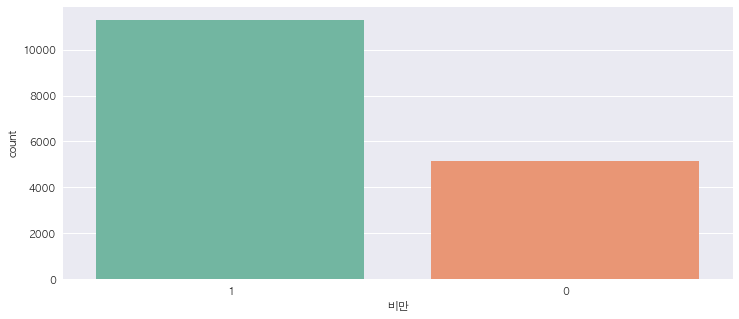

고혈압
0.0    0.885869
1.0    0.114131
Name: 고혈압, dtype: float64


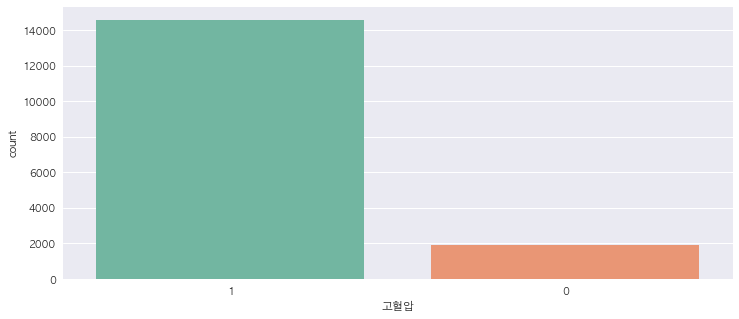

당뇨병
0.0    0.955247
1.0    0.044753
Name: 당뇨병, dtype: float64


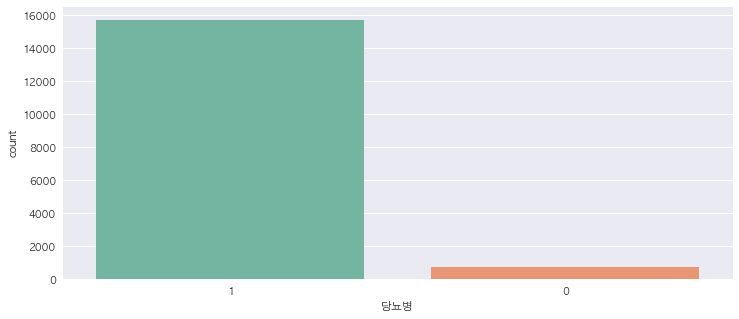

고콜레스테롤혈증
0.0    0.90028
1.0    0.09972
Name: 고콜레스테롤혈증, dtype: float64


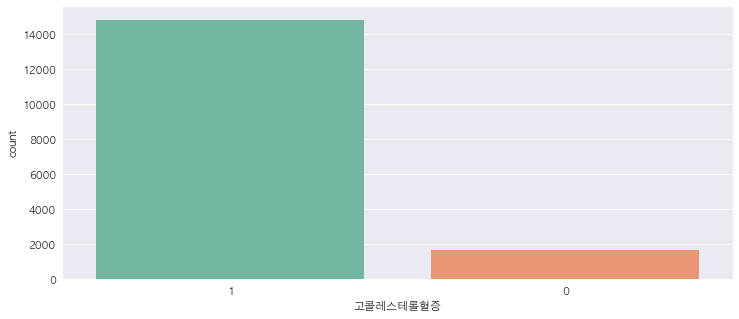

고중성지방혈증
0.0    0.875167
1.0    0.124833
Name: 고중성지방혈증, dtype: float64


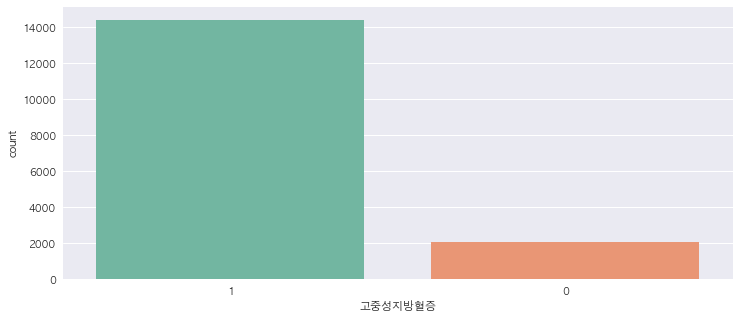

B형간염
0.0    0.969537
1.0    0.030463
Name: B형간염, dtype: float64


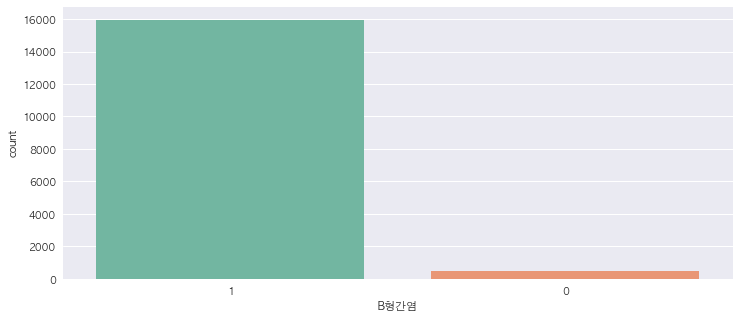

빈혈
0.0    0.913474
1.0    0.086526
Name: 빈혈, dtype: float64


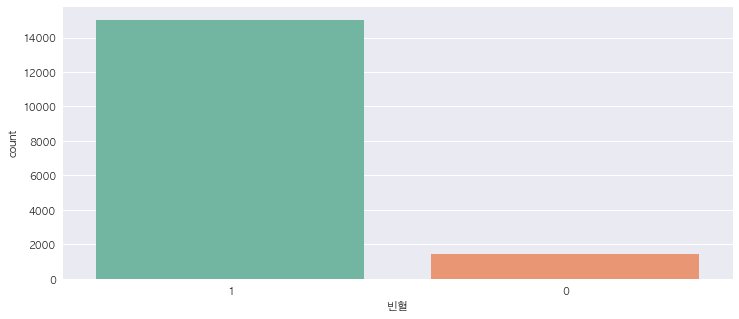

뇌졸중
 0.0    0.807734
-1.0    0.189286
 1.0    0.002979
Name: 뇌졸중, dtype: float64


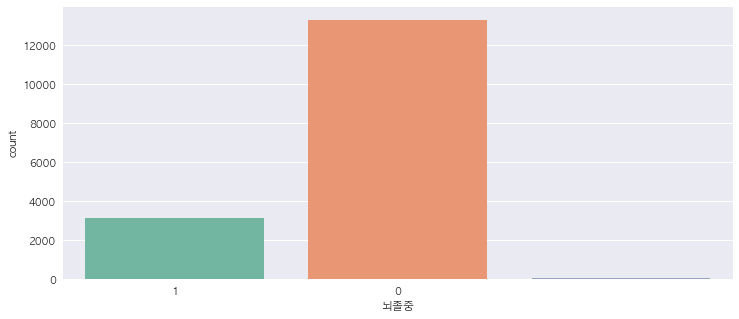

협심증또는심근경색증
 0.0    0.809437
-1.0    0.188496
 1.0    0.002067
Name: 협심증또는심근경색증, dtype: float64


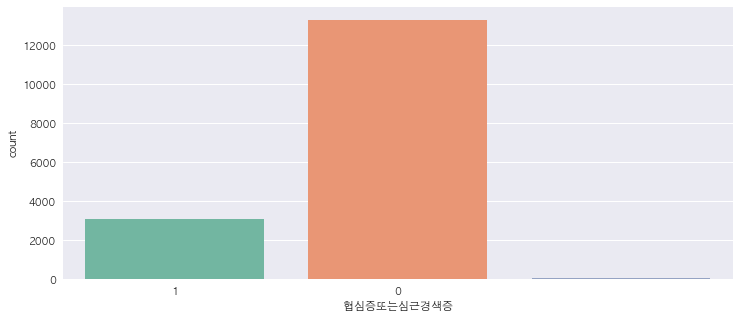

천식
 0.0    0.790223
-1.0    0.184787
 1.0    0.024991
Name: 천식, dtype: float64


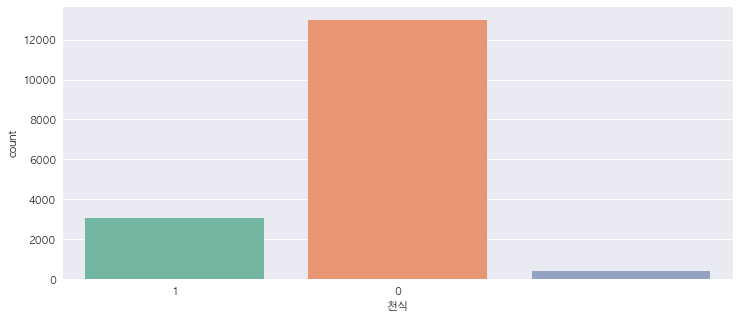

아토피피부염
 0.0    0.776663
-1.0    0.179132
 1.0    0.044205
Name: 아토피피부염, dtype: float64


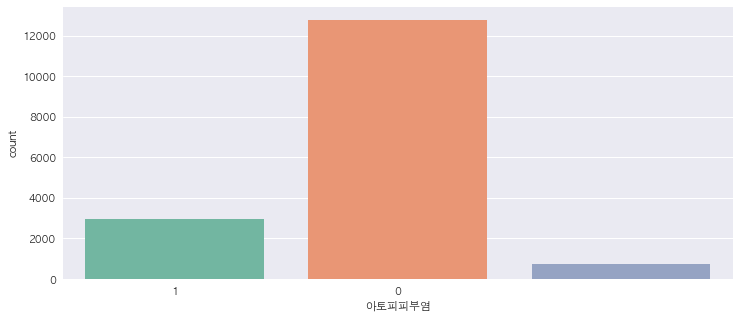

골관절염
 0.0    0.803174
-1.0    0.183814
 1.0    0.013012
Name: 골관절염, dtype: float64


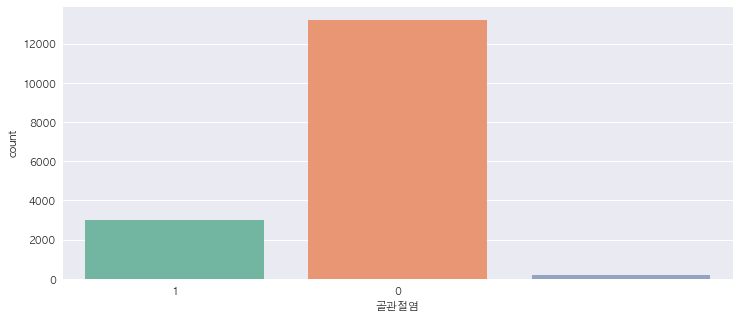

우울증
 0.0    0.796668
-1.0    0.168369
 1.0    0.034963
Name: 우울증, dtype: float64


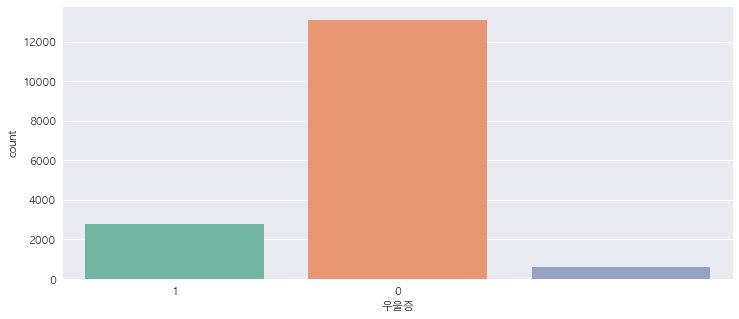

In [2]:
obj.vis_target(obj.data)